# High Dim Compute Squared Euclidean Distance (+Normalize)

### Front matter
ADD (D//8) * ( (N//8) * 64 + (N%8) * 8 + 7*8 + N*8 ) + (D%8) * (8 * (N//8) + (N%8) + 7 +N )
MUL D + 1

### Main AVX
ADD (N//8) * (112*D + 448 + ( (N//8) -1) * (64*D + 256) + (N%8)*(2*D + 8) )
MUL (N//8) * (56*D + 56 + ( (N//8) -1) * (32*D + 4) + (N%8)*(1*D + 1) )

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from visualization import plot

mpl.rcParams['figure.figsize'] = (8.1, 5)
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 15

Lets define the flops depending on the input size.

In [1]:
def get_flops(N, d):
    W = 2*N+2*d + N*d + (1.5)*d*N*(N-1)
    return W

def get_flops_avx(N, d):
    W = (d//8) * ( (N//8) * 64 + (N%8) * 8 + 7*8 + N*8 ) + (d%8) * (8 * (N//8) + (N%8) + 7 +N )
    W += d + 1
    W += 2
    W += (N//8) * (112*d + 448 + ( (N//8) -1) * (64*d + 256) + (N%8)*(2*d + 8) )
    W += (N//8) * (56*d + 56 + ( (N//8) -1) * (32*d + 4) + (N%8)*(1*d + 1) )
    return W

In [19]:
data_non2 = pd.read_csv("./bench_nonpower2.csv")
data_2 = pd.read_csv("./bench_power2.csv")
data = pd.concat([data_2, data_non2])
func_names = data.columns.values[2:]

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


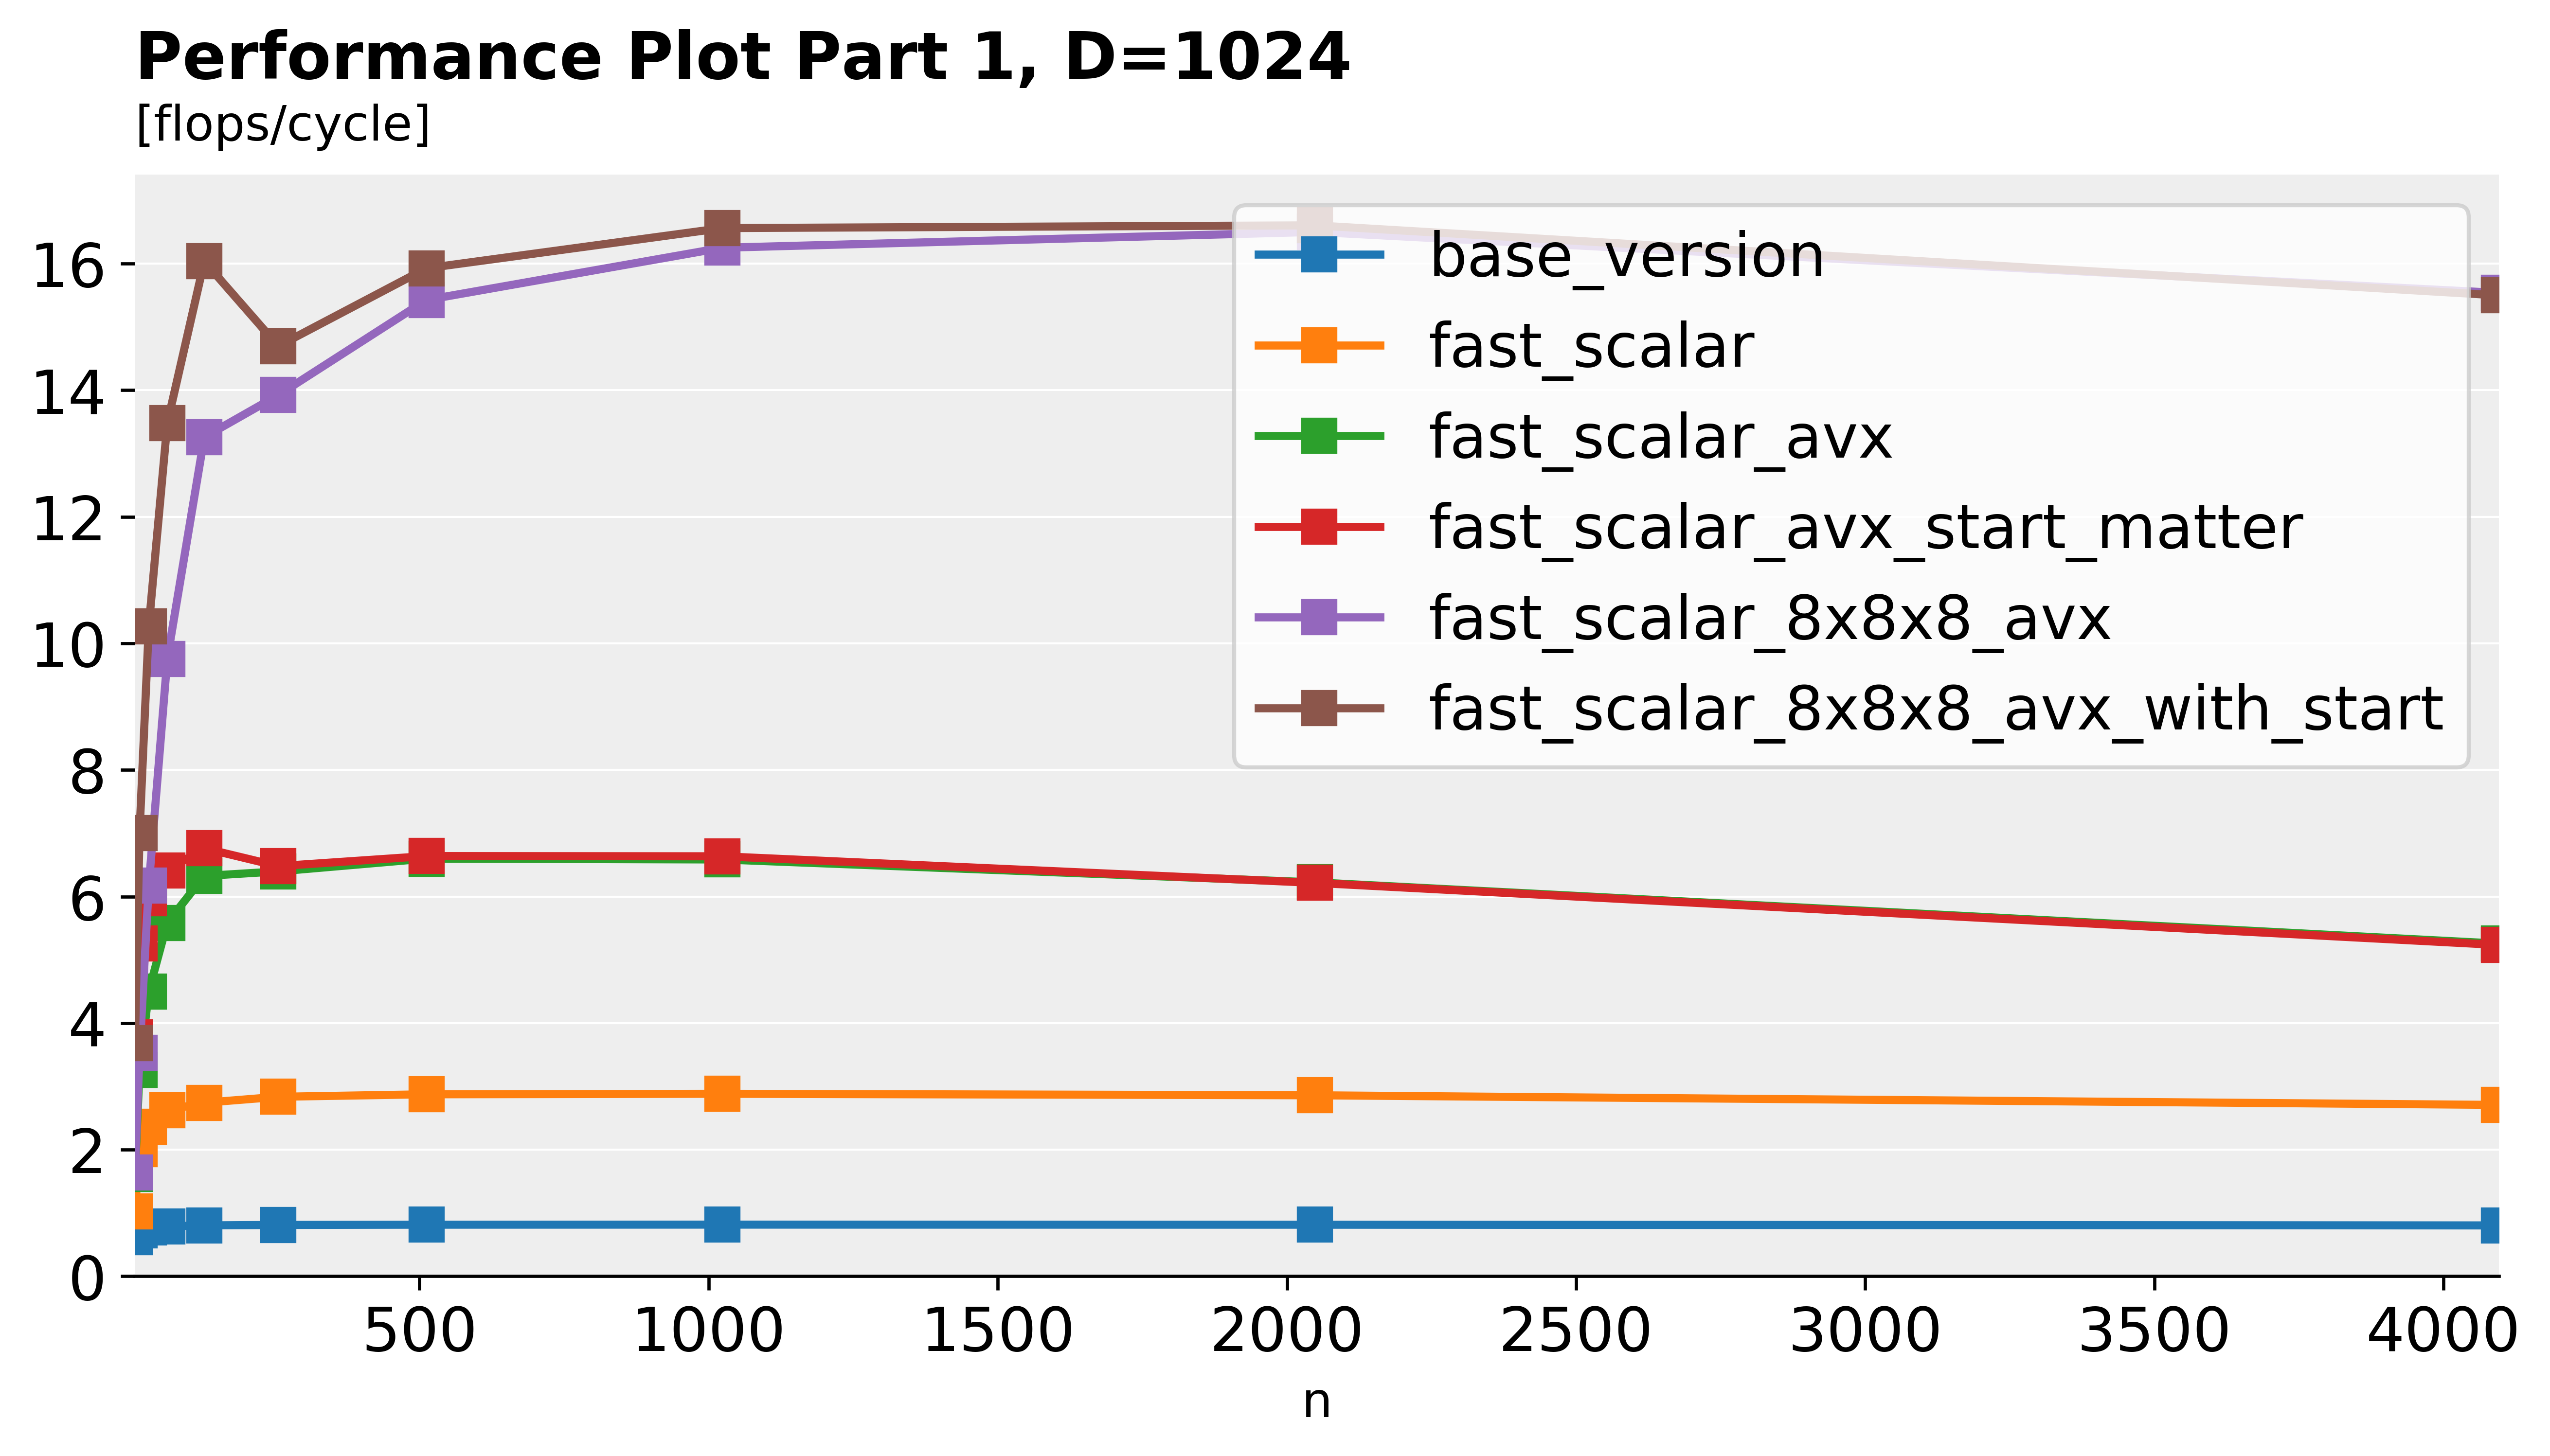

In [6]:
# N = list(sorted(data['N'].unique()))
D = list(sorted(data['D'].unique()))

for d in D:
# for d in [1024]:
    data_d = data.loc[data['D'] == d]
    N = data_d['N'].as_matrix()
    flops = get_flops(N, d)
    perf = []
    speedup = []
    cycles_base = data_d[func_names[0]].as_matrix()
    for func in func_names:
        cycles = data_d[func].as_matrix()
        P = flops / cycles
        S = cycles_base/cycles
        perf.append(P)
        speedup.append(S)
#     print(len(perf))
    plot(N, perf, labels=func_names, ylim=None, title="Performance Plot Part 1, D="+str(d))    
    plt.show()
#     plot(N, speedup, labels=func_names, ylim=None, ylabel="Speedup", title="Speedup D="+str(d))    
#     plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


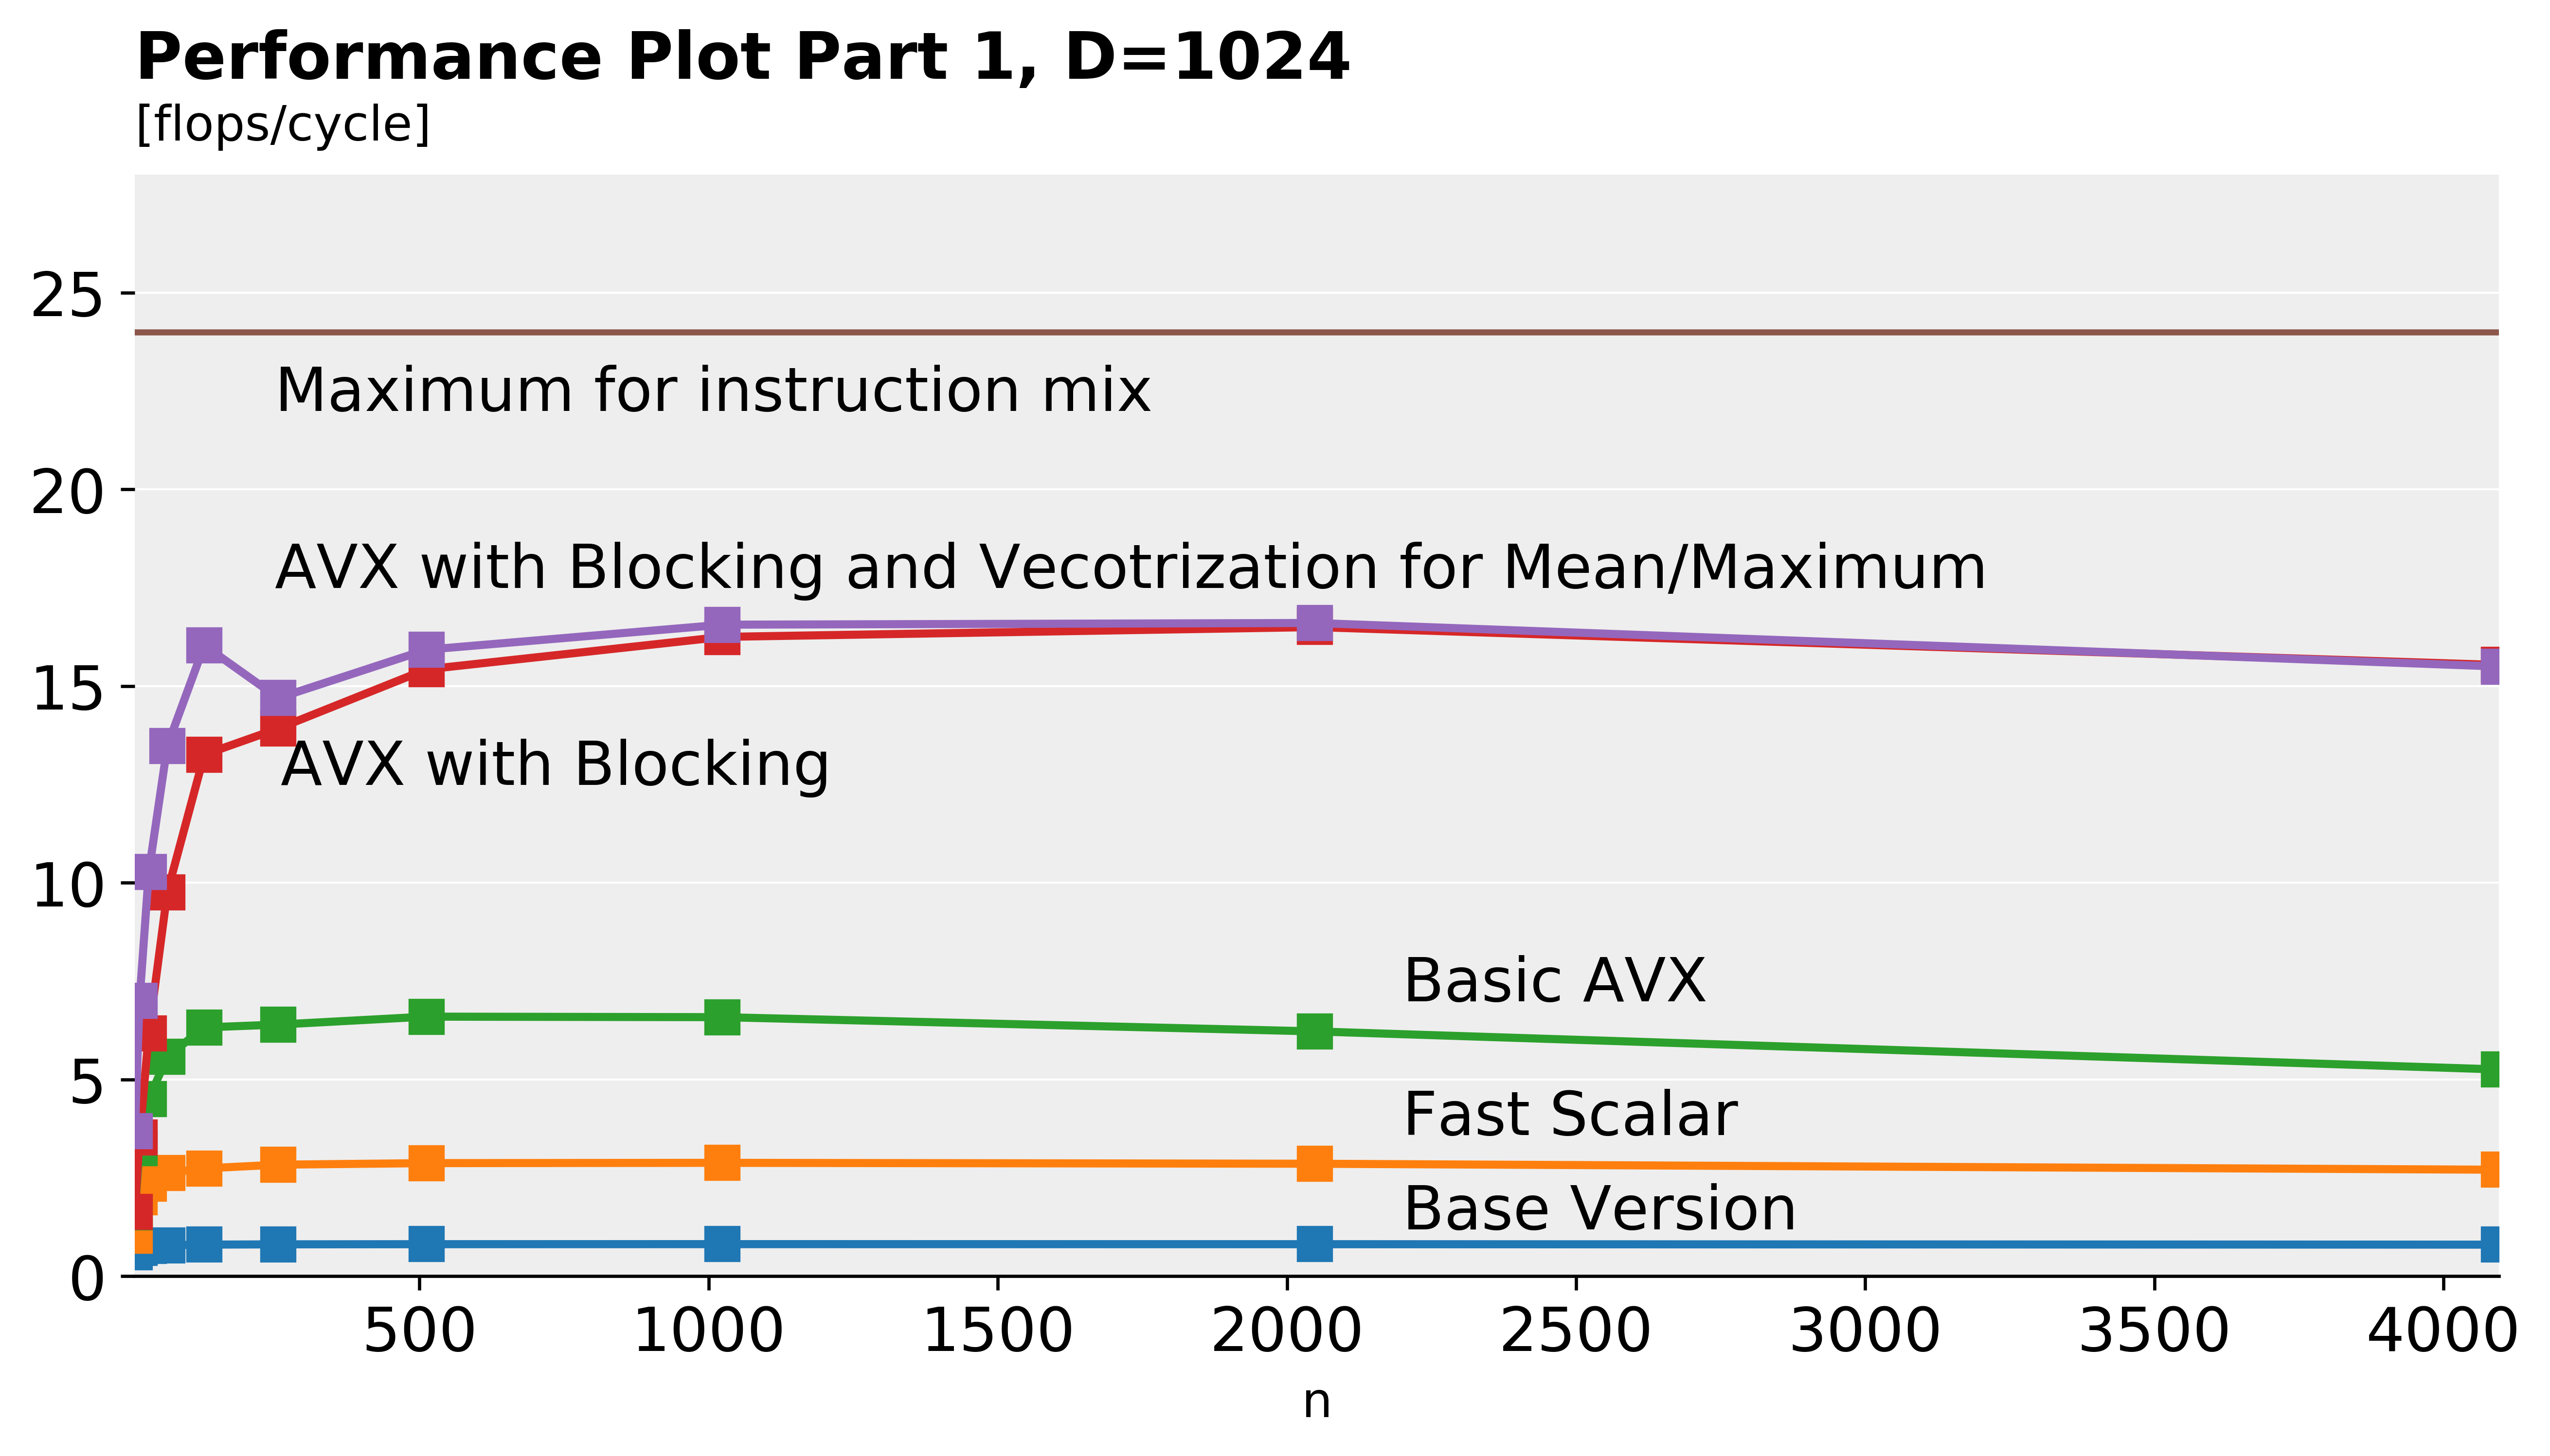

In [38]:
# N = list(sorted(data['N'].unique()))
D = list(sorted(data['D'].unique()))
for d in [1024]:
    data_d = data.loc[data['D'] == d]
    N = data_d['N'].as_matrix()
    flops = get_flops(N, d)
    perf = []
    speedup = []
    
#     cycles_base = data_d[func_names[0]].as_matrix()
    functions_to_plot = ['base_version', 'fast_scalar', 'fast_scalar_avx', 'fast_scalar_8x8x8_avx', 'fast_scalar_8x8x8_avx_with_start']
    for func in func_names:
        if func in functions_to_plot:
            cycles = data_d[func].as_matrix()
            P = flops / cycles
            S = cycles_base/cycles
            perf.append(P)
            speedup.append(S)
#     print(len(perf))
    label_names = np.copy(func_names)
    print()
#     label_names[0] = "Base Version"
#     label_names[1] = "Fast Scalar Version"
#     label_names[2] = "AVX Version"
#     label_names[4] = "AVX with 8x8x8 Blocking"
#     label_names[5] = "AVX with 8x8x8 Blocking"
    plot(N, perf, labels=functions_to_plot, ylim=28, title="Performance Plot Part 1, D="+str(d), legend=False)    
    plt.text(2200, 7, "Basic AVX")
    plt.text(2200, 3.6, "Fast Scalar")
    plt.text(2200, 1.2, "Base Version")
    plt.text(260, 12.5, "AVX with Blocking")
    plt.text(250, 17.5, "AVX with Blocking and Vecotrization for Mean/Maximum")
    plt.plot([0, np.max(N)], [24, 24], '-')
    plt.text(250, 22, "Maximum for instruction mix")
    plt.show()

## Euler
icc

In [2]:
data = pd.read_csv("./bench_euler.csv")
func_names = data.columns.values[2:]

NameError: name 'pd' is not defined

In [3]:
# N = list(sorted(data['N'].unique()))
D = list(sorted(data['D'].unique()))

for d in [1000]:
    data_d = data.loc[data['D'] == d]
    N = data_d['N'].as_matrix()
    flops = get_flops(N, d)
    perf = []
    speedup = []
    cycles_base = data_d[func_names[0]].as_matrix()
    for func in func_names:
        cycles = data_d[func].as_matrix()
        P = flops / cycles
        S = cycles_base/cycles
        perf.append(P)
        speedup.append(S)
#     print(len(perf))
    title = "Performance, D = " + str(d)
    ylabel = "flops/cycle"
    legend = False
    lw = 2
    marker = "s"
    markersize = 8
    labels_fontsize = 12
    fontsize = 20
    xlabel = "n"

    fig = plt.figure()
    if title:
        fig.suptitle(title, fontweight='bold', fontsize=16, x=0, ha='left')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=.88, left=0, right=1)

    base, = ax.plot(N, perf[0], linewidth=lw, marker=marker, markersize=markersize, label="Baseline")
    best_scalar, = ax.plot(N, perf[1], linewidth=lw, marker=marker, markersize=markersize, label="Best Scalar")
    naive_avx, = ax.plot(N, perf[2], linewidth=lw, marker=marker, markersize=markersize, label="Naive AVX")
    avx_blocking, = ax.plot(N, perf[3], linewidth=lw, marker=marker, markersize=markersize, label="AVX Blocking")
    avx_blocking_2, = ax.plot(N, perf[4], linewidth=2*lw, marker=marker, markersize=markersize, label="AVX Blocking + AVX for Mean/Max")

    ax.text(3000, 2.8, "Best Scalar", color=best_scalar.get_color())
    ax.text(1100, 1.5, "Baseline", color=base.get_color())
    ax.text(4000, 7, "Naive AVX", color=naive_avx.get_color())
    ax.text(1500, 12.2, "AVX Blocking", color=avx_blocking.get_color())
    ax.text(4000, 16, "AVX Blocking + AVX for Mean/Max", color=avx_blocking_2.get_color(), fontweight="bold")

    ax.plot([0, np.max(N)], [24, 24], linewidth=lw, c='k')


    ax.set_xlim([N.min(), N.max()])
    ax.set_xlabel(xlabel, fontsize=labels_fontsize)

    # For runtime plots where on the yaxis there is an exponent, place the text
    # on the axis title
    exponent_text = ''
    ax.ticklabel_format(axis='y', style='sci')
    plt.draw()
    if ax.yaxis.get_offset_text().get_text() != '':
        ax.yaxis.major.formatter._useMathText = True
        plt.draw()
        exponent_text = '[{}]'.format(ax.yaxis.get_offset_text().get_text())
        ax.yaxis.offsetText.set_visible(False)

    ax.set_title(
        '[{}]{}'.format(ylabel, exponent_text),
        fontsize=labels_fontsize,
        position=(0, 1.0),
        ha='left',
        va='bottom')

    ax.yaxis.grid(color='#ffffff', linestyle='-', linewidth=.5)
    ax.set_facecolor('#eeeeee')
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.set_xticks(np.arange(1000, 10000+1, 1000))
    ax.set_xticklabels(np.arange(1000, 10000+1, 1000))
    cache_3 = 8 * 2**20.    
    N_cache3 = -d + np.sqrt(d*d + cache_3)
    N_cache3 = N_cache3/2
    ax.axvline(N_cache3, c="k")
    ax.text(1100, 17.5, "L3 Cache", fontweight="bold")

    
    ax.text(5000, 22, "Best possible for instruction mix", fontweight="bold")
    #plt.savefig("euler/bench.png", bbox_inches="tight")

    plt.show()

NameError: name 'data' is not defined

In [19]:
d = 1000
cache_3 = 8 * 2**20.
N = -d + np.sqrt(d*d + 4*cache_3)
N = N/2

4878.3017955868854